In [1]:
#derivative f(x)= 3x^3
#f(2) = 24
#learning rate 0.1
#updated x = x - learning rate * derivative
#x = 2 - 0.1*24 = 2 - 2.4 = -0.4


In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/yuvvvvv/Downloads/GovernmentExpenditureonEducation.csv')
df.head()

,year,total_expenditure_on_education
0,1981,942517
1,1982,1358430
2,1983,1611647
3,1984,1769728
4,1985,1812376


In [8]:
df['year'] = df['year'] / max(df['year'])
df['total_expenditure_on_education'] = df['total_expenditure_on_education'] / max(df['total_expenditure_on_education'])
df.head()

,year,total_expenditure_on_education
0,0.979723,0.071149
1,0.980218,0.102546
2,0.980712,0.121661
3,0.981207,0.133595
4,0.981701,0.136814


$$\begin{align}
∇_\mathbf{w}C(\mathbf{w}) &=
∇_\mathbf{w} \sum_{i=1}^m (f(\mathbf{x}_i, \mathbf{w})-y_i)^2 \\
&=
\sum_{i=1}^m ∇_\mathbf{w} (f(\mathbf{x}_i, \mathbf{w})-y_i)^2 \\
&=
\sum_{i=1}^m 2 (f(\mathbf{x}_i, \mathbf{w})-y_i) ∇_\mathbf{w} f(\mathbf{x}_i, \mathbf{w})
\text{ chain rule}\\
&=
\sum_{i=1}^m 2 (f(\mathbf{x}_i, \mathbf{w})-y_i) ∇_\mathbf{w} \exp(-\mathbf{x}_i^T \mathbf{w}) \\
&=
- \sum_{i=1}^m 2 (f(\mathbf{x}_i, \mathbf{w})-y_i) \exp(-\mathbf{x}_i^T \mathbf{w}) ∇_\mathbf{w} (\mathbf{x}_i^T \mathbf{w})
\text{ chain rule} \\
&=
- \sum_{i=1}^m 2 (f(\mathbf{x}_i, \mathbf{w})-y_i) \exp(-\mathbf{x}_i^T \mathbf{w}) \mathbf{x}_i^T \\
&=
- \sum_{i=1}^m 2 (f(\mathbf{x}_i, \mathbf{w})-y_i) f(\mathbf{x}_i, \mathbf{w}) \mathbf{x}_i^T \\
\end{align}$$


In [31]:
def exp_cost_gradient(X, w, y):

    # Compute prediction, cost and gradient based on mean square error loss
    pred_y = np.exp(-X @ w)
    cost   = np.sum((pred_y - y)*(pred_y - y))
    gradient = -2 * (pred_y - y) * pred_y @ X

    return pred_y, cost, gradient

In [40]:
# Gradient descent
learning_rate = 0.03

#initialise w0 to start the gradient descent
w = np.zeros(2)

#Compute the gradient of w0
pred_y, cost, gradient = exp_cost_gradient(X, w, y)

#Set num of iterations
#create list to store the cost at each iteraetion
num_iters = 2000000;
cost_vec = np.zeros(num_iters)
print('Initial Cost =', cost)

for i in range(0, num_iters):

    # update w
    w = w - learning_rate*gradient

    # compute updated cost and new gradient
    pred_y, cost, gradient = exp_cost_gradient(X, w, y)
    cost_vec[i] = cost

    #Print statement every 20k iterations
    if(i % 200000 == 0):
        print('Iter', i, ': cost =', cost)

#Calculate cost for the final updated w
pred_y, cost, gradient = exp_cost_gradient(X, w, y)
print('Final Cost =', cost)

Initial Cost = 15.016093489957909
Iter 0 : cost = 11.28455765316087
Iter 200000 : cost = 0.2646560882523522
Iter 400000 : cost = 0.22462324460594024
Iter 600000 : cost = 0.22357326470643707
Iter 800000 : cost = 0.22354068774518182
Iter 1000000 : cost = 0.2235396477869024
Iter 1200000 : cost = 0.22353961441990064
Iter 1400000 : cost = 0.22353961334835332
Iter 1600000 : cost = 0.22353961331393613
Iter 1800000 : cost = 0.22353961331283065
Final Cost = 0.22353961331279515


Text(0.5, 1.0, 'Learning rate = 0.03')

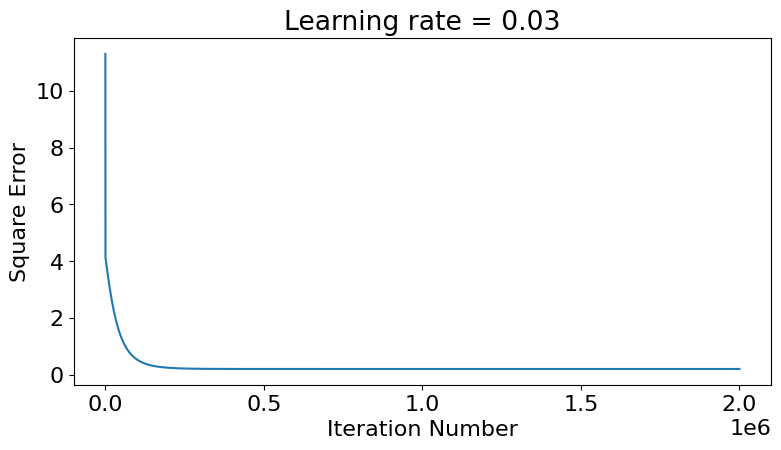

In [41]:
import matplotlib.pyplot as plt 
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})

#plt.plot(x, y)
plt.plot(np.arange(0, num_iters, 1), cost_vec)

#Annotations
plt.xlabel('Iteration Number')
plt.ylabel('Square Error')
plt.xticks(np.arange(0, num_iters+1, 500000))
plt.title('Learning rate = ' + str(learning_rate))
#plt.savefig('Figures/FigTut8Cost' + str(learning_rate) + '.eps')

In [42]:
pred_y = X@w

In [43]:
pred_y

array([ 1.89199091,  1.84214734,  1.79230377,  1.7424602 ,  1.69261663,
        1.64277306,  1.59292949,  1.54308591,  1.49324234,  1.44339877,
        1.3935552 ,  1.34371163,  1.29386806,  1.24402449,  1.19418092,
        1.14433735,  1.09449377,  1.0446502 ,  0.99480663,  0.94496306,
        0.89511949,  0.84527592,  0.79543235,  0.74558878,  0.69574521,
        0.64590163,  0.59605806,  0.54621449,  0.49637092,  0.44652735,
        0.39668378,  0.34684021,  0.29699664,  0.24715307,  0.19730949,
        0.14746592,  0.09762235,  0.04777878, -0.00206479, -0.05190836,
       -0.10175193, -0.1515955 ])